1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

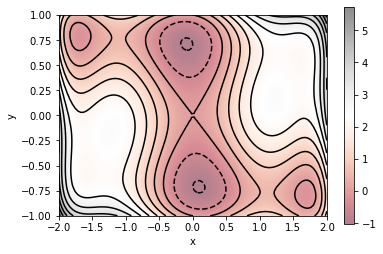

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def f(x):
    return (4 - 2.1*x[0]**2 + (1/3)*x[0]**4)*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y, sparse=True)
z = f((X, Y))

# nice article about density and contour plots:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

plt.contour(x, y, z, 15, colors='black')
plt.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='RdGy', alpha=0.5, aspect=1.5)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
# notes:
# scipy.optimize.root -> Find a root of a vector function
# scipy.optimize.minimize_scalar -> Minimization of scalar function of one variable
# scipy.optimize.minimize -> Minimization of scalar function of one or more variables

# find global minima
x0_guess = np.array([[0, 0.75], [0, -0.75]])
x0 = np.zeros(4).reshape(2,2)
value = np.zeros(2)

for i in range(0,2):   
    sol = optimize.minimize(f, x0_guess[i])
    if sol['success']:
        x0[i] = sol['x']
        value[i] = sol['fun'] 
        
print('global minima:', x0[0], 'and', x0[1])
print('function value:', value[0])

global minima: [-0.08984202  0.71265641] and [ 0.08984201 -0.71265642]
function value: -1.0316284534898768


In [3]:
# for an initial guess of (x, y) = (0, 0) the algorithm gets stuck in a (false) local minimum

sol = optimize.minimize(f, [0,0])
print(sol, '\n')

# check if (x, y) = (0, 0) is indeed a minimum by looking around it
x = [0.1, -0.1]
value = [f([i,j]) for i in x for j in x]
    
if any(f < sol['fun'] for f in value):
    print(sol['x'], 'is not a minimum')

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.]) 

[0. 0.] is not a minimum


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

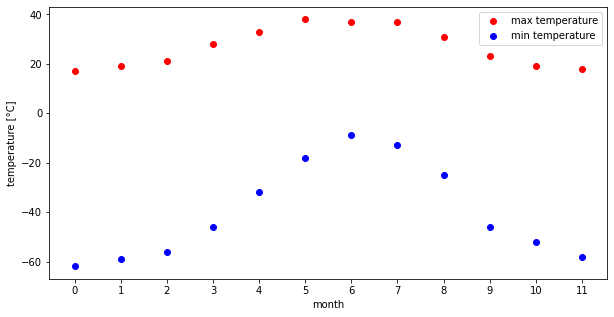

In [19]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

t_max = np.array((17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18))
t_min = np.array((-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58))

fig, ax = plt.subplots(figsize=(10,5))
months = np.arange(12)
ax.plot(months, t_max, 'ro', label='max temperature')
ax.plot(months, t_min, 'bo', label='min temperature')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel('month')
ax.set_ylabel('temperature [°C]')
ax.legend()
plt.show()

max temperature fit
parameters:
 [10.63955649 -2.97590566 27.62925851]
covariance matrix:
 [[ 0.16670123 -0.00058181  0.01373835]
 [-0.00058181  0.00523889  0.00029334]
 [ 0.01373835  0.00029334  0.09004797]]
A = 10.64 +- 0.41
B = -2.98 +- 0.07
C = 27.63 +- 0.30

min temperature fit
parameters:
 [ 25.20712456  -3.40355893 -37.71075225]
covariance matrix:
 [[ 1.8229474  -0.00701028  0.13838164]
 [-0.00701028  0.0098457   0.00376442]
 [ 0.13838164  0.00376442  0.96601537]]
A = 25.21 +- 1.35
B = -3.40 +- 0.10
C = -37.71 +- 0.98


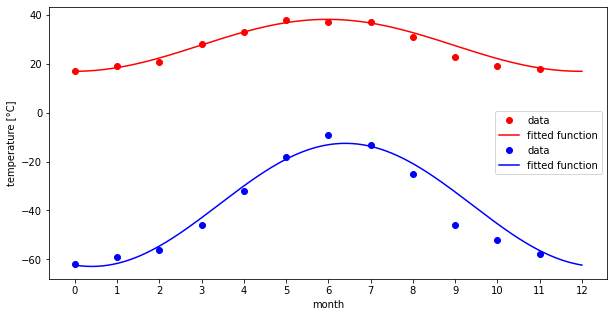

In [20]:
# the fit using a sine funtcion is reasonable
def f(x, A, B, C):
    # fix the period T = 2*pi/nu
    nu = 2*np.pi/x.max()
    return A*np.sin((x + B)*nu) + C

fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(0, 12, 365)

popt_max, pcov_max = optimize.curve_fit(f, months, t_max, p0=[10, 0, 30], full_output=False)
print('max temperature fit')
print("parameters:\n", popt_max)
print("covariance matrix:\n", pcov_max)
print("A = %.2f +- %.2f" % (popt_max[0], np.sqrt(pcov_max[0,0])))
print("B = %.2f +- %.2f" % (popt_max[1], np.sqrt(pcov_max[1,1])))
print("C = %.2f +- %.2f" % (popt_max[2], np.sqrt(pcov_max[2,2])))

ax.plot(months, t_max, 'ro', label='data')
ax.plot(x, f(x, popt_max[0], popt_max[1], popt_max[2]), 'r', label='fitted function')

popt_min, pcov_min = optimize.curve_fit(f, months, t_min, p0=[20, 0, -40], full_output=False)
print('\nmin temperature fit')
print("parameters:\n", popt_min)
print("covariance matrix:\n", pcov_min)
print("A = %.2f +- %.2f" % (popt_min[0], np.sqrt(pcov_min[0,0])))
print("B = %.2f +- %.2f" % (popt_min[1], np.sqrt(pcov_min[1,1])))
print("C = %.2f +- %.2f" % (popt_min[2], np.sqrt(pcov_min[2,2])))

ax.plot(months, t_min, 'bo', label='data')
ax.plot(x, f(x, popt_min[0], popt_min[1], popt_min[2]), 'b', label='fitted function')

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel('month')
ax.set_ylabel('temperature [°C]')
ax.legend()
plt.show()

In [21]:
# naive statistical compatibility
N = abs(popt_max[1] - popt_min[1])/np.sqrt(pcov_max[1,1] + pcov_min[1,1])
if N > 3:    
    print('time offsets for min and max temperatures are not compatible')
else:
    print('time offsets for min and max temperatures are compatible')

time offsets for min and max temperatures are not compatible


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [41]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl

import pandas as pd

data = np.load('residuals_261.pkl')



ValueError: Cannot load file containing pickled data when allow_pickle=False

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.